In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=38c2e0e3c754ea5b80035f12d33dc8c7d75a79c08c3b94f48d41a29ef61707e8
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
import pandas as pd
import wikipedia

articles = ['sanrio','movies','anime','England','islands','terrorism','cyber security']
wiki_lst = []
title = []

for article in articles:
  print("loading content: ", article)
  wiki_lst.append(wikipedia.page(article).content)
  title.append(article)
print("examine content")
wiki_lst[:100]

loading content:  sanrio
loading content:  movies
loading content:  anime
loading content:  England
loading content:  islands
loading content:  terrorism
loading content:  cyber security
examine content


['Sanrio Company, Ltd. (株式会社サンリオ, Kabushikigaisha Sanrio) is a Japanese entertainment company. It designs, licenses, and produces products focusing on the kawaii ("cute") segment of Japanese popular culture. Their products include stationery, school supplies, gifts, and accessories which are sold worldwide, including at specialty brand retail stores in Japan. Sanrio\'s best-known character is Hello Kitty, a little cartoon girl cat and one of the most successful marketing brands in the world.Besides selling character goods, Sanrio takes part in film production and publishing. They own the rights to the Mr. Men characters and Japanese licensing rights to the Peanuts characters. Their animatronics branch, called Kokoro Company, Ltd. (kokoro being Japanese for \'heart\') is best known for the Actroid android. The company also runs a franchise of KFC in Saitama Prefecture.\n\n\n== History ==\nShintaro Tsuji founded Sanrio on August 10, 1960, then known as the Yamanashi Silk Company using ¥1

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = ["english"])
X = vectorizer.fit_transform(wiki_lst)
print(vectorizer.get_feature_names_out())
print(X.shape)

['000' '00033' '0007' ... '中央网络安全和信息化领导小组' '山梨' '株式会社サンリオ']
(7, 9030)


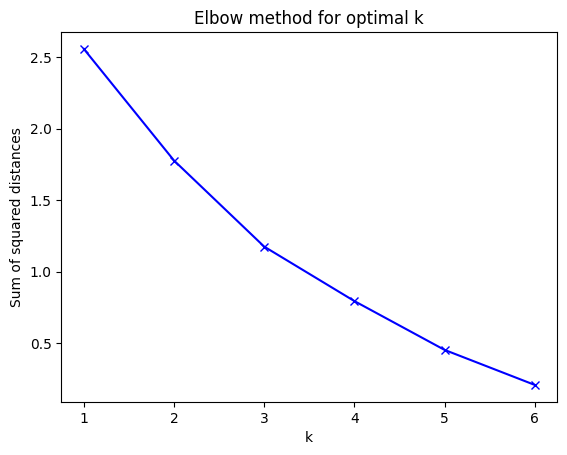

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sum_of_squared_distance = []
K = range(1,7)

for k in K:
  km = KMeans(n_clusters = k, max_iter = 200, n_init=10)
  km = km.fit(X)
  sum_of_squared_distance.append(km.inertia_)

plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel("Sum of squared distances")
plt.title("Elbow method for optimal k")
plt.show()

In [5]:
true_k = 3
model = KMeans(n_clusters = true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels = model.labels_
wiki_cl = pd.DataFrame(list(zip(title, labels)), columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

            title  cluster
1          movies        0
2           anime        0
3         England        0
5       terrorism        0
6  cyber security        0
0          sanrio        1
4         islands        2


Cluster: 0
Titles
        movies
         anime
       England
     terrorism
cyber security


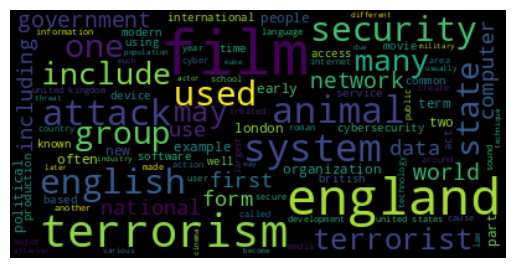

Cluster: 1
Titles
sanrio


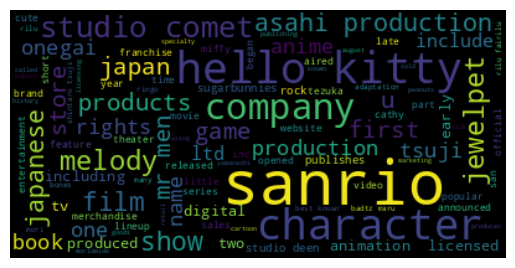

Cluster: 2
Titles
islands


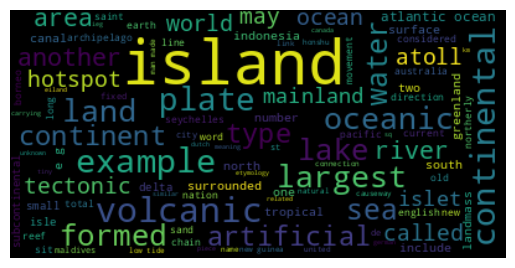

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

result={'cluster':labels, 'wiki':wiki_lst}
result = pd.DataFrame(result)
for k in range(0,true_k):
  s = result[result.cluster==k]
  text = s['wiki'].str.cat(sep=' ')
  text = text.lower()
  text = ' '.join([word for word in text.split()])
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='black').generate(text)
  print("Cluster: {}".format(k))
  print("Titles")
  titles = wiki_cl[wiki_cl.cluster==k]['title']
  print(titles.to_string(index=False))
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [7]:
!pip install yake
!pip install keybert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.5 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23777 sha256=ab11a1b8487baf392e6aedda7e4e25c53cc6ef24a66926c99081881ee32efe3c
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sen

In [8]:
import yake

doc = """Self-supervised learning (SSL) refers to a machine learning paradigm, and corresponding methods, for processing unlabeled data to obtain useful representations that can help with downstream learning tasks. The most salient thing about SSL methods is that they do not need human-annotated labels, which means they are designed to take in datasets consisting entirely of unlabeled data samples. Then the typical SSL pipeline consists of learning supervisory signals (labels generated automatically) in a first stage, which are then used for some supervised learning task in the second and later stages. For this reason, SSL can be described as an intermediate form of unsupervised and supervised learning."""
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(doc)
for kw in keywords:
  print(kw)

('processing unlabeled data', 0.018294883576401577)
('machine learning paradigm', 0.019735299504464544)
('unlabeled data samples', 0.040288804604323034)
('unlabeled data', 0.04144553891475118)
('obtain useful representations', 0.04229428536999253)
('downstream learning tasks', 0.04931854344988429)
('processing unlabeled', 0.05902174573874705)
('SSL', 0.0632433018326526)
('learning', 0.08266981044402755)
('Self-supervised learning', 0.08729979384988212)
('learning paradigm', 0.08729979384988212)
('SSL methods', 0.08830686028839944)
('machine learning', 0.11100992185296119)
('downstream learning', 0.11100992185296119)
('data samples', 0.12495374284879283)
('data to obtain', 0.12754242695497528)
('unlabeled', 0.13833482021119126)
('data', 0.13833482021119126)
('typical SSL pipeline', 0.14177762911325384)
('SSL pipeline consists', 0.14177762911325384)


In [9]:
import spacy
from collections import Counter
from string import punctuation

nlp = spacy.load("en_core_web_sm")

def get_hotwords(text):
  result = []
  pos_tag = ['PROPN','ADJ','NOUN']
  doc = nlp(text.lower())
  for token in doc:
    if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
      continue
    if(token.pos_ in pos_tag):
      result.append(token.text)
  return result

output = set(get_hotwords(doc))
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
  print(item[0])

paradigm
useful
self
learning
typical
datasets
downstream
samples
supervisory
reason


In [10]:
from keybert import KeyBERT

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)
print(keywords)

[('ssl', 0.4746), ('supervised', 0.4268), ('learning', 0.345), ('datasets', 0.2695), ('data', 0.2563)]


In [11]:
text = """Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.'
 I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
 I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players.
 I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all.
 I think just because you're in the same sport doesn't mean that you have to be friends with everyone just because you're categorized, you're a tennis player, so you're going to get along with tennis players.
 I think every person has different interests. I have friends that have completely different jobs and interests, and I've met them in very different parts of my life.
 I think everyone just thinks because we're tennis players we should be the greatest of friends. But ultimately tennis is just a very small part of what we do.
 There are so many other things that we're interested in, that we do."""

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

stopwords = list(STOP_WORDS)
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

tokens = [token.text for token in doc]
print(tokens)

['Maria', 'Sharapova', 'has', 'basically', 'no', 'friends', 'as', 'tennis', 'players', 'on', 'the', 'WTA', 'Tour', '.', 'The', 'Russian', 'player', 'has', 'no', 'problems', 'in', 'openly', 'speaking', 'about', 'it', 'and', 'in', 'a', 'recent', 'interview', 'she', 'said', ':', "'", 'I', 'do', "n't", 'really', 'hide', 'any', 'feelings', 'too', 'much', '.', "'", '\n ', 'I', 'think', 'everyone', 'knows', 'this', 'is', 'my', 'job', 'here', '.', 'When', 'I', "'m", 'on', 'the', 'courts', 'or', 'when', 'I', "'m", 'on', 'the', 'court', 'playing', ',', 'I', "'m", 'a', 'competitor', 'and', 'I', 'want', 'to', 'beat', 'every', 'single', 'person', 'whether', 'they', "'re", 'in', 'the', 'locker', 'room', 'or', 'across', 'the', 'net', '.', '\n ', 'So', 'I', "'m", 'not', 'the', 'one', 'to', 'strike', 'up', 'a', 'conversation', 'about', 'the', 'weather', 'and', 'know', 'that', 'in', 'the', 'next', 'few', 'minutes', 'I', 'have', 'to', 'go', 'and', 'try', 'to', 'win', 'a', 'tennis', 'match', '.', '\n ', '

In [12]:
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [13]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1
print(word_frequencies)

{'Maria': 1, 'Sharapova': 1, 'basically': 1, 'friends': 5, 'tennis': 6, 'players': 6, 'WTA': 1, 'Tour': 1, 'Russian': 1, 'player': 2, 'problems': 1, 'openly': 1, 'speaking': 1, 'recent': 1, 'interview': 1, 'said': 2, 'hide': 1, 'feelings': 1, '\n ': 8, 'think': 4, 'knows': 1, 'job': 1, 'courts': 2, 'court': 1, 'playing': 1, 'competitor': 1, 'want': 1, 'beat': 1, 'single': 1, 'person': 2, 'locker': 1, 'room': 1, 'net': 1, 'strike': 1, 'conversation': 1, 'weather': 1, 'know': 1, 'minutes': 1, 'try': 1, 'win': 1, 'match': 1, 'pretty': 1, 'competitive': 1, 'girl': 1, 'hellos': 1, 'sending': 1, 'flowers': 1, 'Uhm': 1, 'friendly': 1, 'close': 2, 'lot': 2, 'away': 1, 'strategic': 1, 'different': 4, 'men': 1, 'tour': 2, 'women': 1, 'sport': 1, 'mean': 1, 'categorized': 1, 'going': 1, 'interests': 2, 'completely': 1, 'jobs': 1, 'met': 1, 'parts': 1, 'life': 1, 'thinks': 1, 'greatest': 1, 'ultimately': 1, 'small': 1, 'things': 1, 'interested': 1}


In [14]:
max_frequency = max(word_frequencies.values())
for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_frequency
print(word_frequencies)

{'Maria': 0.125, 'Sharapova': 0.125, 'basically': 0.125, 'friends': 0.625, 'tennis': 0.75, 'players': 0.75, 'WTA': 0.125, 'Tour': 0.125, 'Russian': 0.125, 'player': 0.25, 'problems': 0.125, 'openly': 0.125, 'speaking': 0.125, 'recent': 0.125, 'interview': 0.125, 'said': 0.25, 'hide': 0.125, 'feelings': 0.125, '\n ': 1.0, 'think': 0.5, 'knows': 0.125, 'job': 0.125, 'courts': 0.25, 'court': 0.125, 'playing': 0.125, 'competitor': 0.125, 'want': 0.125, 'beat': 0.125, 'single': 0.125, 'person': 0.25, 'locker': 0.125, 'room': 0.125, 'net': 0.125, 'strike': 0.125, 'conversation': 0.125, 'weather': 0.125, 'know': 0.125, 'minutes': 0.125, 'try': 0.125, 'win': 0.125, 'match': 0.125, 'pretty': 0.125, 'competitive': 0.125, 'girl': 0.125, 'hellos': 0.125, 'sending': 0.125, 'flowers': 0.125, 'Uhm': 0.125, 'friendly': 0.125, 'close': 0.25, 'lot': 0.25, 'away': 0.125, 'strategic': 0.125, 'different': 0.5, 'men': 0.125, 'tour': 0.25, 'women': 0.125, 'sport': 0.125, 'mean': 0.125, 'categorized': 0.125, 

In [15]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[Maria Sharapova has basically no friends as tennis players on the WTA Tour., The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.'
 , I think everyone knows this is my job here., When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
 , So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
 , I'm a pretty competitive girl., I say my hellos, but I'm not sending any players flowers as well., Uhm, I'm not really friendly or close to many players.
 , I have not a lot of friends away from the courts.', When she said she is not really close to a lot of players, is that something strategic that she is doing?, Is it different on the men's tour than the women's tour?, ', No, not at all.
 , I think just b

In [16]:
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]

sentence_scores

{Maria Sharapova has basically no friends as tennis players on the WTA Tour.: 2.5,
 The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.'
  : 2.375,
 I think everyone knows this is my job here.: 0.75,
 When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
  : 2.625,
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
  : 2.75,
 I'm a pretty competitive girl.: 0.375,
 I say my hellos, but I'm not sending any players flowers as well.: 1.125,
 Uhm, I'm not really friendly or close to many players.
  : 2.125,
 I have not a lot of friends away from the courts.': 1.25,
 When she said she is not really close to a lot of players, is that something strategic that she is doing?: 1.625,
 Is it different

In [17]:
from heapq import nlargest

select_length = int(len(sentence_tokens)*0.3)
select_length

5

In [18]:
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
summary

[I think just because you're in the same sport doesn't mean that you have to be friends with everyone just because you're categorized, you're a tennis player, so you're going to get along with tennis players.
  ,
 I have friends that have completely different jobs and interests, and I've met them in very different parts of my life.
  ,
 I think everyone just thinks because we're tennis players we should be the greatest of friends.,
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
  ,
 When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
  ]

In [19]:
final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)

In [20]:
print(text)

Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.'
 I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
 I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players.
 I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all.
 I think just because you're in the

In [21]:
!pip install transformers

In [22]:
import transformers

summarizer = transformers.pipeline("summarization")
summarized = summarizer(text, min_length=75, max_length=300)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [23]:
print(len(summarized[0]['summary_text']))
print(summarized[0]['summary_text'])

403
 Maria Sharapova says she is not close to players on the WTA Tour . 'I'm not really friendly or close to many players. I think everyone just thinks because we're tennis players we should be the greatest of friends. There are so many other things that we're interested in, that we do. I have friends that have completely different jobs and interests, and I've met them in very different parts of my life'


In [24]:
len(text)
print(text)

Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.'
 I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.
 So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.
 I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players.
 I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all.
 I think just because you're in the